# Customer Churn Project

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

df=pd.read_csv('customer_churn.csv')

In [3]:
# Displaying all columns in DataFrame

pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking the shape of the DataFrame

df.shape

(7043, 21)

In [5]:
# Listing all columns in the DataFrame

col=df.columns
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Displaying information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Checking for missing values in the DataFrame

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Converting 'TotalCharges' column to numeric type

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
# Checking again for missing values after conversion

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Dropping rows with missing values

df.dropna(inplace=True)

In [11]:
#Statistical Desciption

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Checking for outliers


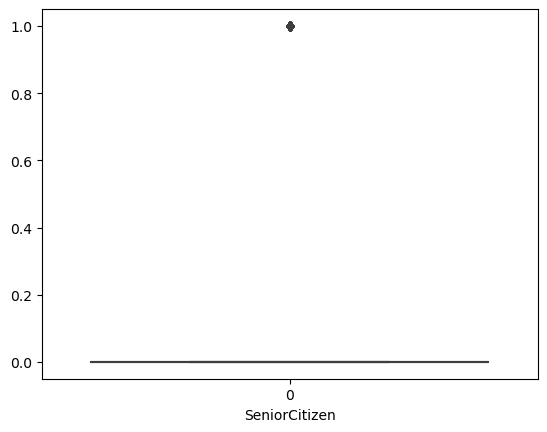

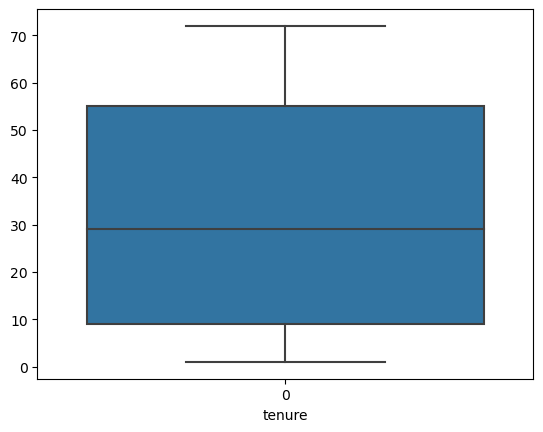

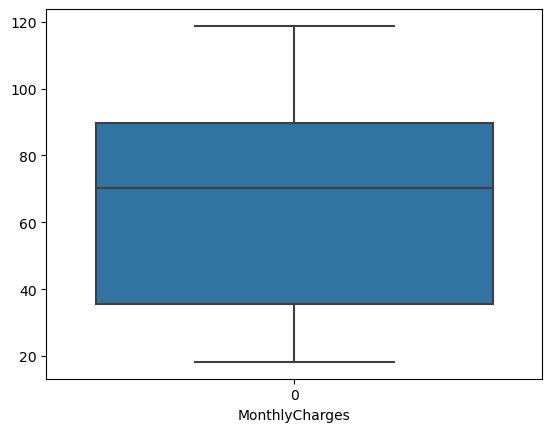

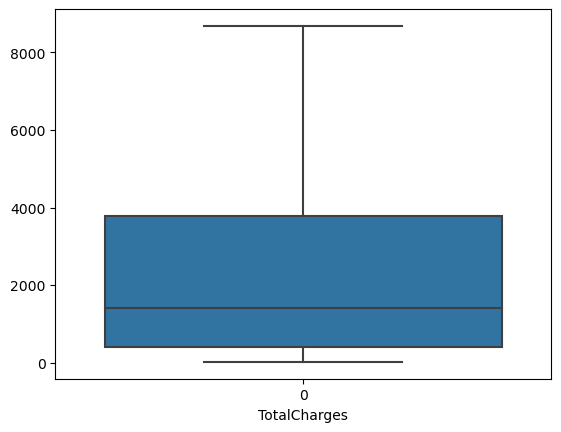

In [12]:
# Visualizing outliers using boxplots

for i in col:
    if df[i].dtypes!='object':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

there are no outliers present in the dataset

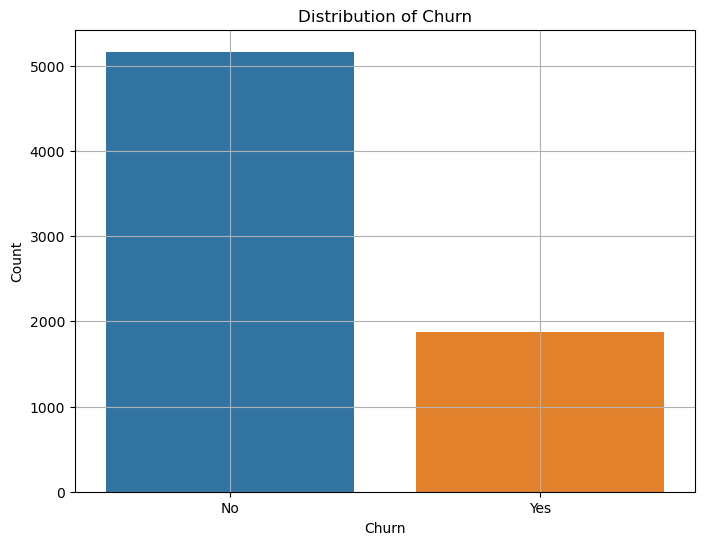

In [13]:
# Visualizing the distribution of the target variable 'Churn'

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid()
plt.show()

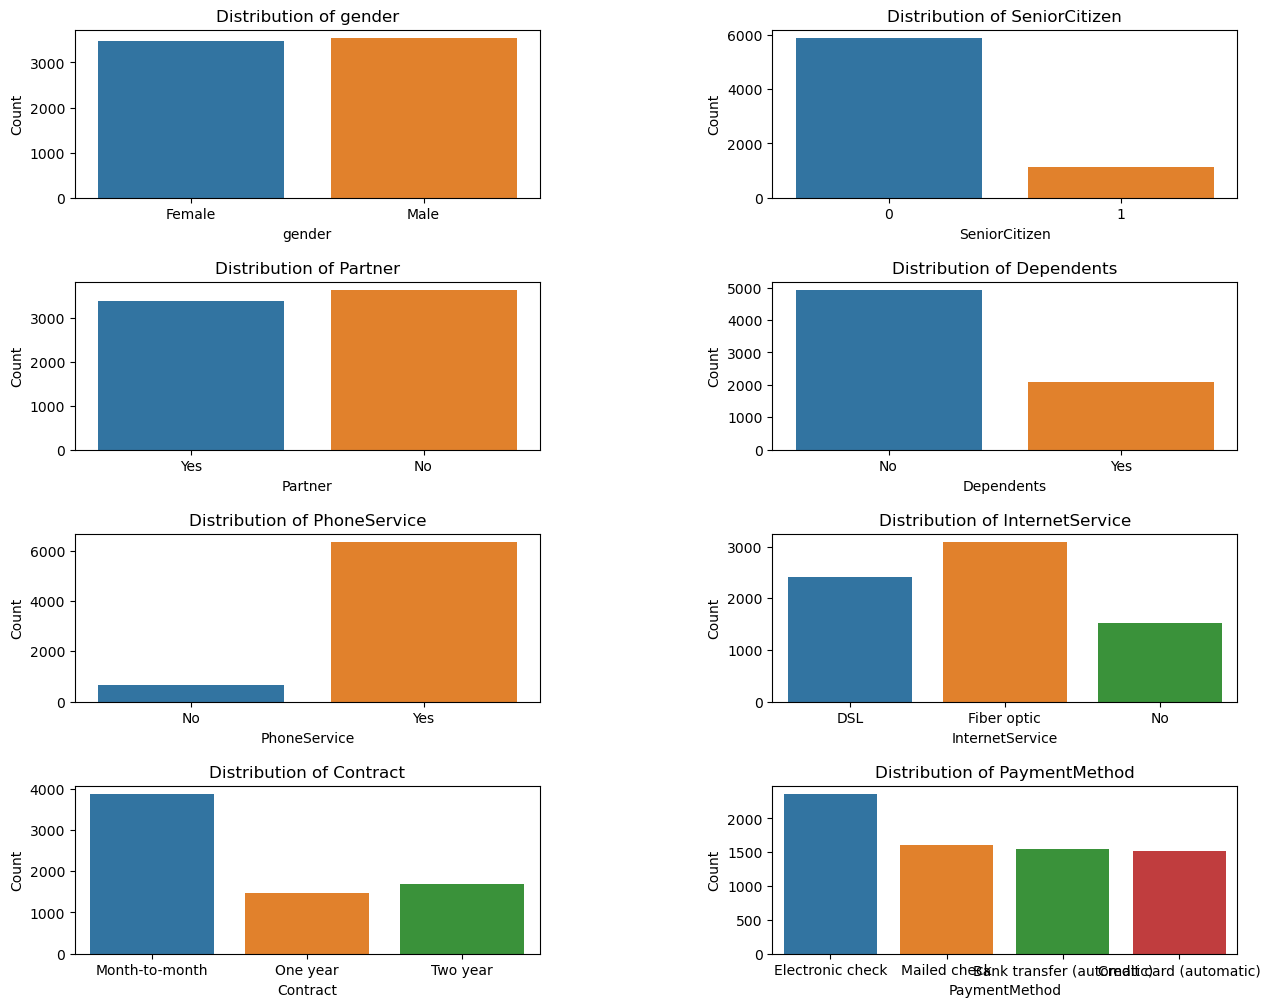

In [14]:
# List of categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                        'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']

# Setting up the subplot layout
num_rows = (len(categorical_features) + 1) // 2
num_cols = 2

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plotting bar charts for each categorical feature
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(data=df, x=feature, ax=axes[row][col])
    axes[row][col].set_title(f'Distribution of {feature}')
    axes[row][col].set_xlabel(feature)
    axes[row][col].set_ylabel('Count')

# Removing any empty subplot if the number of features is odd
if len(categorical_features) % 2 != 0:
    fig.delaxes(axes[num_rows-1, num_cols-1])

plt.show()


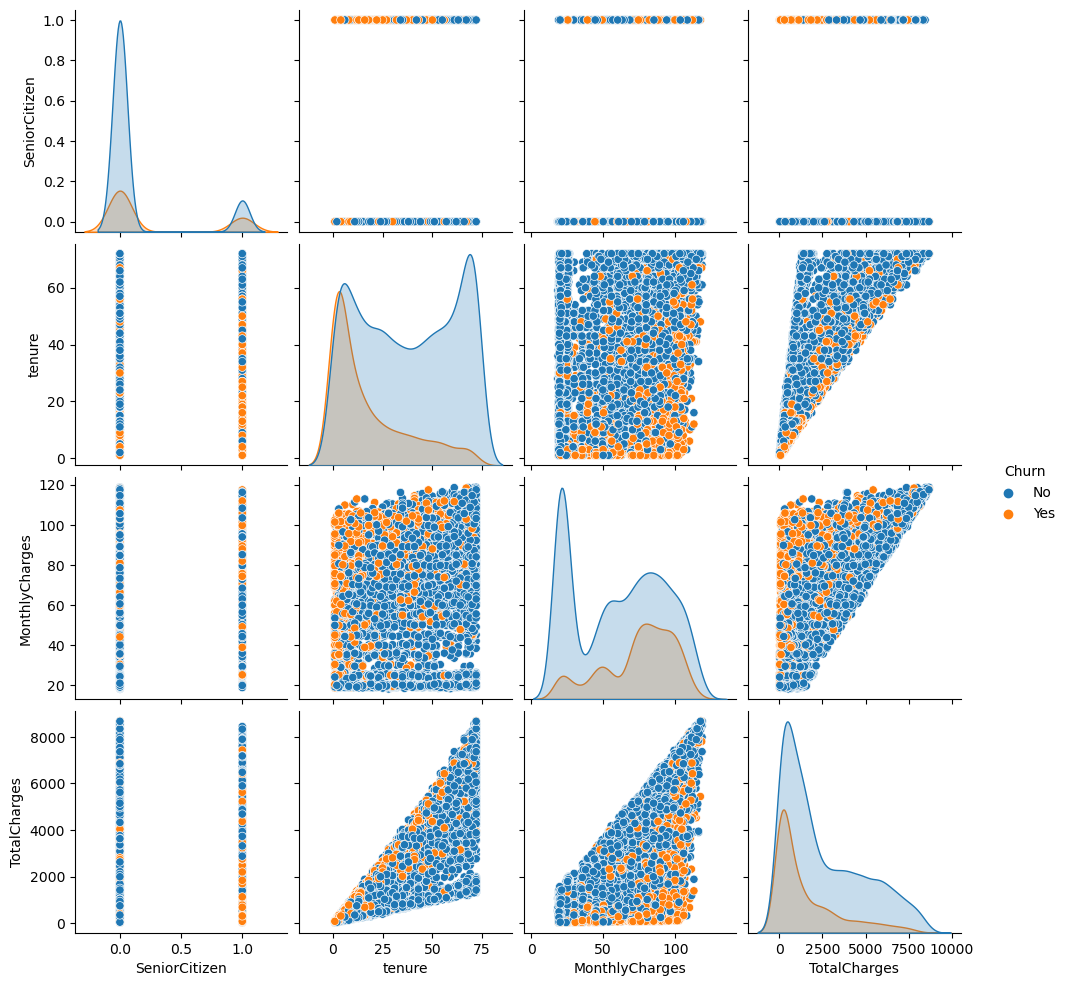

In [15]:
 # Visualizing pairwise relationships between variables with respect to 'Churn'

sns.pairplot(df, hue='Churn')
plt.show()

# Data Encoding

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# Data Encoding using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
col=df.columns

for i in col:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [19]:
# Checking the DataFrame after encoding

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# CORELATION

Single Correlation

In [20]:
# Dropping the 'customerID' column as it's not useful for modeling

df.drop(columns='customerID',inplace=True)

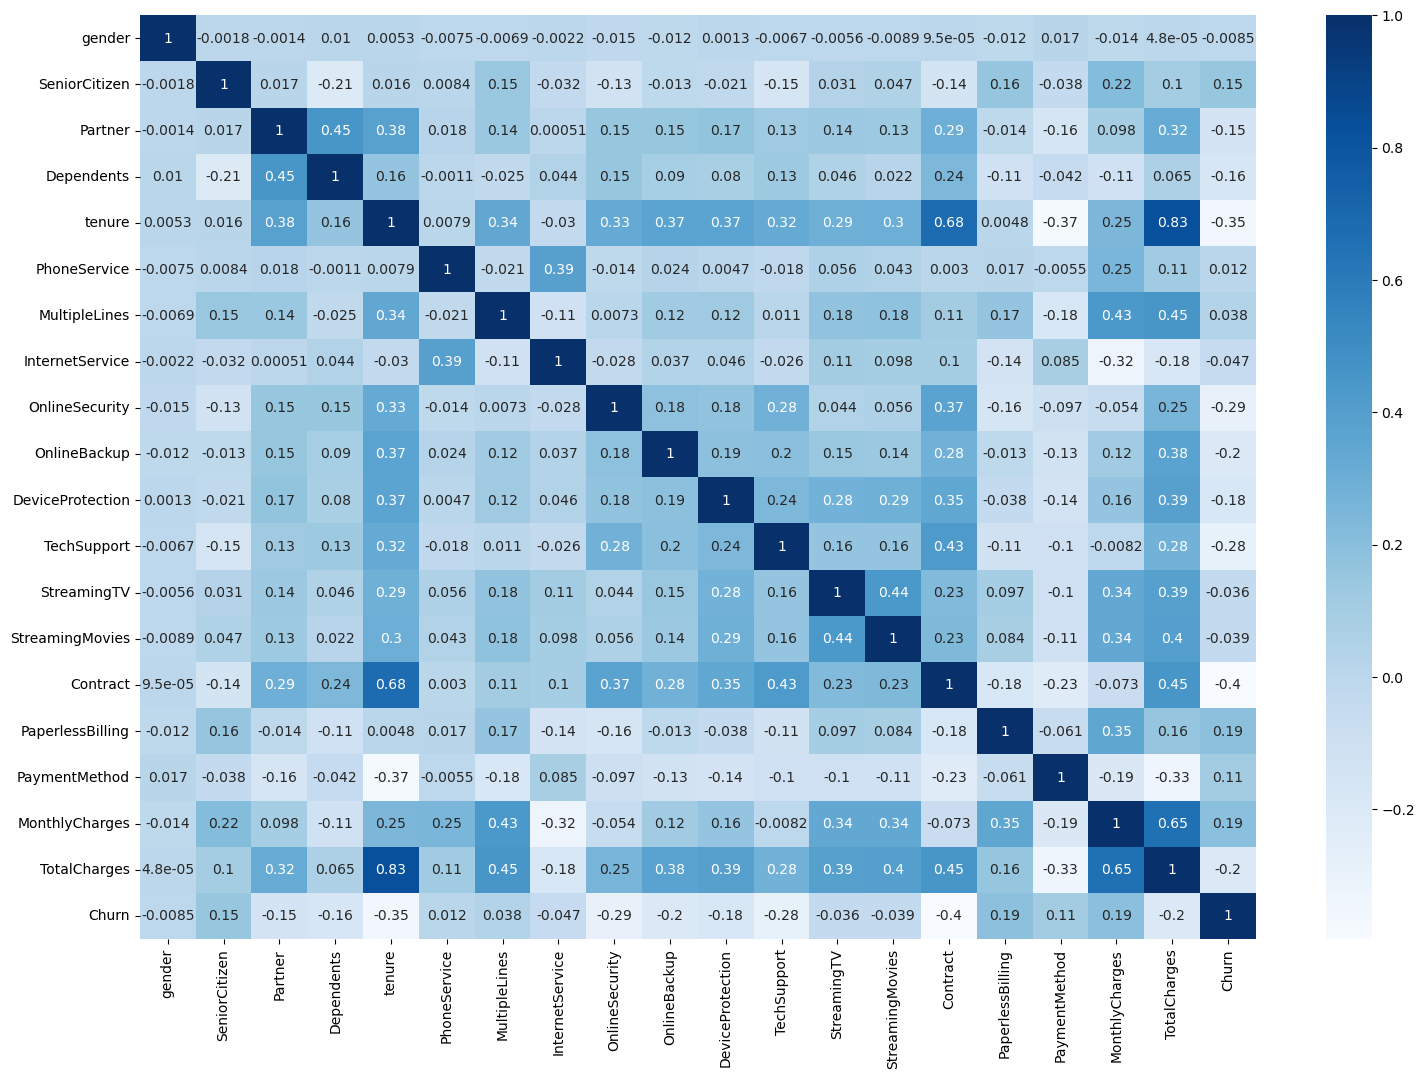

In [21]:
# Visualizing correlations between variables using heatmap

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [22]:
# Dropping highly correlated columns ('TotalCharges' and 'tenure')

df.drop(columns=['TotalCharges','tenure'],inplace=True)

## Checking multicollinearity using Variance Inflation Factor (VIF)


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
# Separating features and target variable

x=df.drop(columns='Churn')
y=df.Churn

In [25]:
# Calculating VIF for each feature

vif_data=pd.DataFrame()
vif_data['Columns']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Columns,vif
0,gender,1.922487
1,SeniorCitizen,1.362225
2,Partner,2.702327
3,Dependents,1.943514
4,PhoneService,14.169896
5,MultipleLines,2.637586
6,InternetService,4.314662
7,OnlineSecurity,2.206466
8,OnlineBackup,2.335457
9,DeviceProtection,2.594375


In [26]:
# Removing 'MonthlyCharges' column due to high multicollinearity with other variables

x=x.drop(columns='MonthlyCharges')

In [27]:
# Recalculating VIF after removing 'MonthlyCharges'

vif_data=pd.DataFrame()
vif_data['Columns']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Columns,vif
0,gender,1.918523
1,SeniorCitizen,1.332819
2,Partner,2.687435
3,Dependents,1.936693
4,PhoneService,7.828462
5,MultipleLines,2.216509
6,InternetService,3.072444
7,OnlineSecurity,2.205921
8,OnlineBackup,2.299378
9,DeviceProtection,2.546696


In [28]:
x=x.drop(columns='PhoneService')

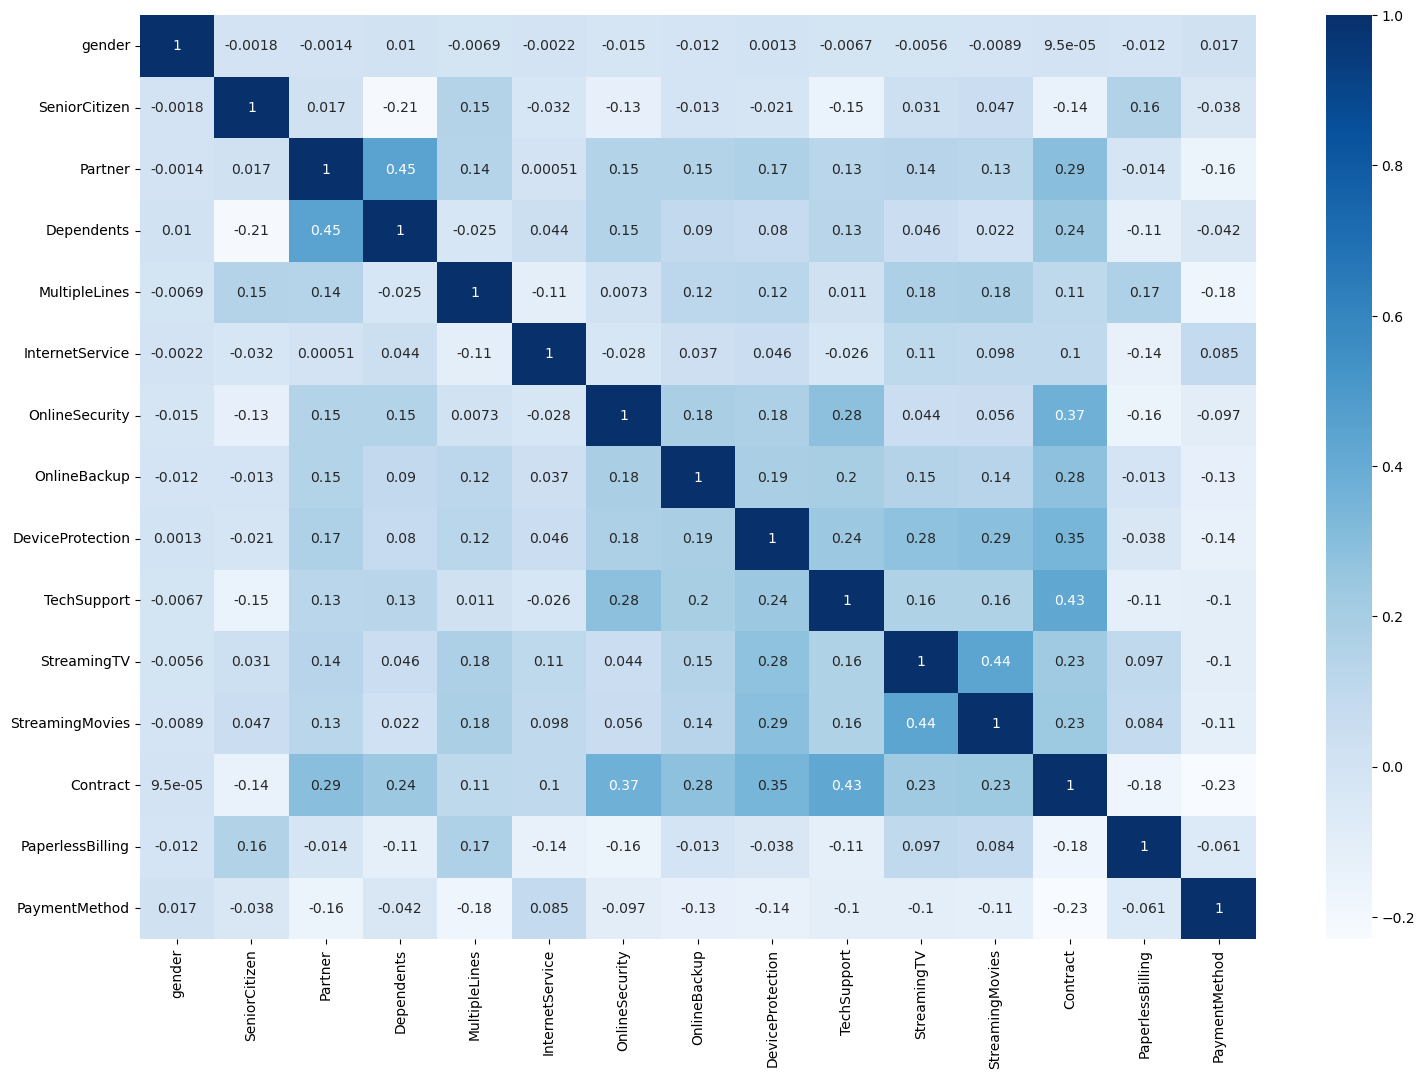

In [29]:
# Visualizing multicollinearity using heatmap

plt.figure(figsize=(18,12))
sns.heatmap(x.corr(),annot=True,cmap='Blues')
plt.show()

# MODEL BUILDING

In [30]:
# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=100)

# 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred=lr.predict(x_test)

In [34]:
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import classification_report

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Evaluation for Logistic Regression Classifier
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Logistic Regression Classifier:
Accuracy: 0.7639362912400455
Precision: 0.601078167115903
Recall: 0.45510204081632655
F1 Score: 0.5180023228803717


# 2. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [38]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred=dt.predict(x_test)

In [40]:
# Evaluation for Decision Tree Classifier
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Decision Tree Classifier:
Accuracy: 0.6996587030716723
Precision: 0.46153846153846156
Recall: 0.46530612244897956
F1 Score: 0.4634146341463415


# 3. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf=RandomForestClassifier()

In [43]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=rf.predict(x_test)

In [45]:
# Evaluation for Random Forest Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Random Forest Classifier:
Accuracy: 0.7400455062571104
Precision: 0.5409429280397022
Recall: 0.4448979591836735
F1 Score: 0.48824188129899215


# 4. Gradient Boosting Classifier


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [47]:
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [48]:
y_pred_gb = gb.predict(x_test)

In [49]:
# Evaluation for Gradient Boosting Classifier

print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

Gradient Boosting Classifier:
Accuracy: 0.7781569965870307
Precision: 0.6282051282051282
Recall: 0.5
F1 Score: 0.5568181818181818


# Conclusion:
This project aimed to predict customer churn using machine learning models. After preprocessing the data and exploring its distribution, we built and evaluated several models including Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting Classifier. The Gradient Boosting Classifier achieved the highest accuracy at approximately 77.82%. This analysis offers valuable insights for businesses to devise strategies to retain customers and improve customer satisfaction. Further improvements can be made by exploring advanced techniques and incorporating additional features for better predictive performance.